
🔍 Training Random Forest...
✅ Random Forest Performance:
  Accuracy:  0.9455
  Precision: 0.9527
  Recall:    0.9455
  F1 Score:  0.9452

🔍 Training KNN...
✅ KNN Performance:
  Accuracy:  0.8545
  Precision: 0.8836
  Recall:    0.8545
  F1 Score:  0.8558

🔍 Training SVM...
✅ SVM Performance:
  Accuracy:  0.8545
  Precision: 0.8794
  Recall:    0.8545
  F1 Score:  0.8559

🔍 Training Logistic Regression...
✅ Logistic Regression Performance:
  Accuracy:  0.8909
  Precision: 0.9139
  Recall:    0.8909
  F1 Score:  0.8905

🔍 Training Decision Tree...
✅ Decision Tree Performance:
  Accuracy:  0.9091
  Precision: 0.9332
  Recall:    0.9091
  F1 Score:  0.9093

📊 Model Performance Comparison:
                      accuracy  precision    recall        f1
Random Forest        0.945455   0.952727  0.945455  0.945166
KNN                  0.854545   0.883636  0.854545  0.855758
SVM                  0.854545   0.879394  0.854545  0.855884
Logistic Regression  0.890909   0.913939  0.890909  0.890505

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


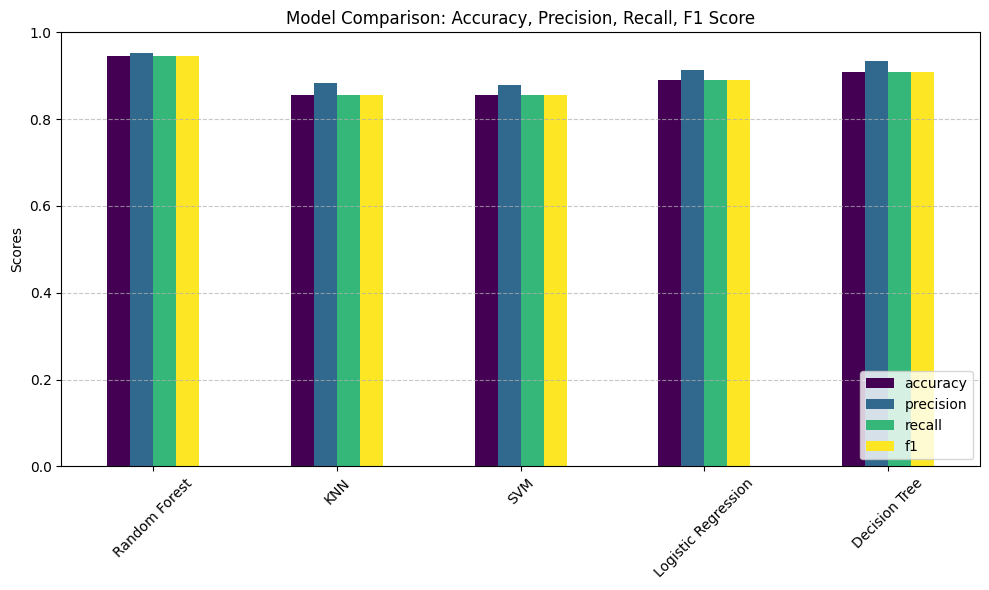

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/SSL12.csv')  # Replace with actual path

# Preprocessing
X = data.drop(columns='LABEL')  # Assuming 'LABEL' is your target column
y = data['LABEL']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)  # Added Decision Tree
}

# Evaluate models
results = {}
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...")

    # For neural network, use scaled data
    if model_name == "Neural Network":
        model.fit(X_train_scaled, y_train)  # Use scaled data for MLP
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    # Print results
    print(f"✅ {model_name} Performance:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Print model comparison
print("\n📊 Model Performance Comparison:\n", results_df)

# Plot results
plt.figure(figsize=(10, 6))
results_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', ax=plt.gca(), colormap='viridis')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Train Models and display Results


Best Model: Random Forest
Accuracy: 0.9455
Precision: 0.9527
Recall: 0.9455
F1 Score: 0.9452


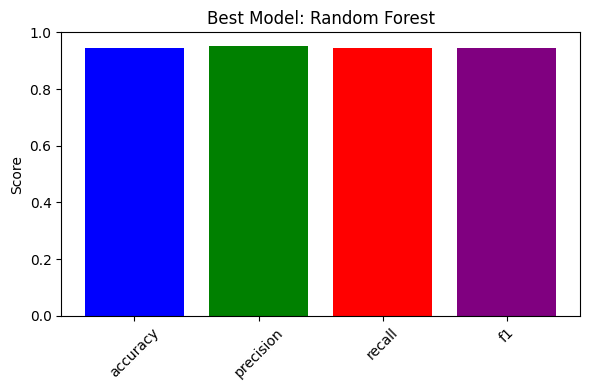

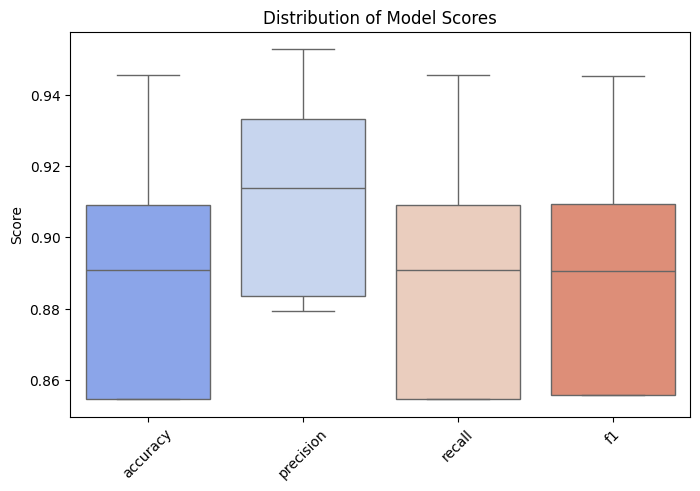

In [ ]:
import seaborn as sns


# Select the best model based on highest F1-score
best_model_name = results_df['f1'].idxmax()
best_model_metrics = results[best_model_name]

# Print best model and its metrics
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_model_metrics['accuracy']:.4f}")
print(f"Precision: {best_model_metrics['precision']:.4f}")
print(f"Recall: {best_model_metrics['recall']:.4f}")
print(f"F1 Score: {best_model_metrics['f1']:.4f}")

# Plot best model's metrics
plt.figure(figsize=(6, 4))
plt.bar(best_model_metrics.keys(), best_model_metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title(f'Best Model: {best_model_name}')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot extreme values
plt.figure(figsize=(8, 5))
sns.boxplot(data=results_df, palette='coolwarm')
plt.title('Distribution of Model Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Function to adjust overfitting by tuning RandomForest hyperparameters
from sklearn.model_selection import GridSearchCV

def reduce_overfitting_rf(X_train, y_train, X_test, y_test):
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize RandomForest with baseline parameters
    rf = RandomForestClassifier(random_state=42)

    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding model
    best_rf_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")

    # Train the model
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model
    train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))

    # Print the results
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")

    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc], color=['blue', 'green'])
    plt.title('Training vs Testing Accuracy (After Overfitting Reduction)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


In [ ]:
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to adjust overfitting by tuning RandomForest hyperparameters
def reduce_overfitting_rf(X_train, y_train, X_test, y_test):
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize RandomForest with baseline parameters
    rf = RandomForestClassifier(random_state=42)

    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding model
    best_rf_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")

    # Train the model
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model
    train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))

    # Print the results
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")

    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc], color=['blue', 'green'])
    plt.title('Training vs Testing Accuracy (After Overfitting Reduction)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # Save the best model as 'best_rf_model.pkl'
    with open('best_rf_model_with_12.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)
        print("Best model saved as 'best_rf_model_with_12.pkl'")

    # Save the extracted best model as 'extracted_best_model.pkl'
    with open('extracted_best_rf_model_with_12.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)  # You can replace this with another model if needed
        print("Extracted best model saved as 'extracted_best_rf_model_with_12.pkl'")





🔍 Training Random Forest...
✅ Random Forest Performance:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9455
  Precision: 0.9527
  Recall:    0.9455
  F1 Score:  0.9452

🔍 Training KNN...
✅ KNN Performance:
  Train Accuracy: 0.9263
  Test Accuracy:  0.8545
  Precision: 0.8836
  Recall:    0.8545
  F1 Score:  0.8558

🔍 Training SVM...
✅ SVM Performance:
  Train Accuracy: 0.9447
  Test Accuracy:  0.8545
  Precision: 0.8794
  Recall:    0.8545
  F1 Score:  0.8559

🔍 Training Logistic Regression...
✅ Logistic Regression Performance:
  Train Accuracy: 1.0000
  Test Accuracy:  0.8909
  Precision: 0.9139
  Recall:    0.8909
  F1 Score:  0.8905

🔍 Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Decision Tree Performance:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9091
  Precision: 0.9332
  Recall:    0.9091
  F1 Score:  0.9093

📊 Model Performance Comparison:
                      accuracy_train  accuracy_test  precision    recall  \
Random Forest              1.000000       0.945455   0.952727  0.945455   
KNN                        0.926267       0.854545   0.883636  0.854545   
SVM                        0.944700       0.854545   0.879394  0.854545   
Logistic Regression        1.000000       0.890909   0.913939  0.890909   
Decision Tree              1.000000       0.909091   0.933182  0.909091   

                           f1  
Random Forest        0.945166  
KNN                  0.855758  
SVM                  0.855884  
Logistic Regression  0.890505  
Decision Tree        0.909252  


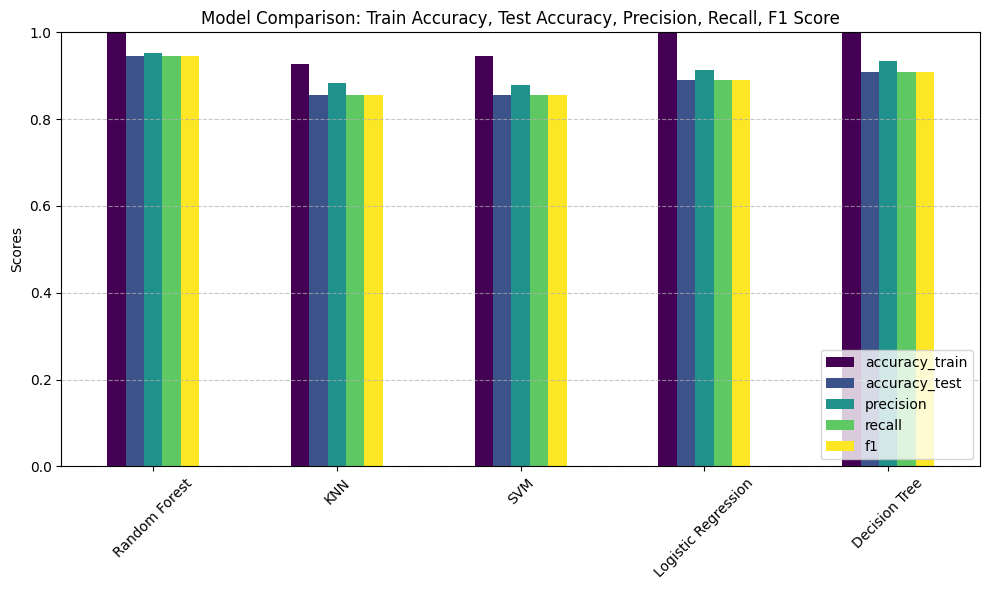

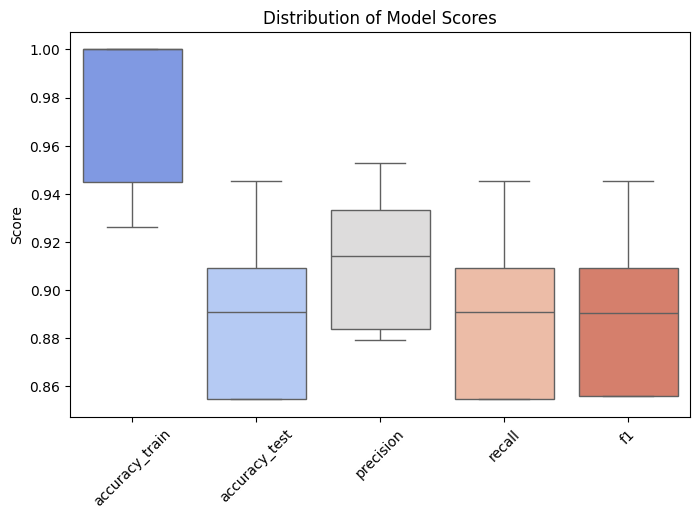


Best Model: Random Forest
Train Accuracy: 1.0000
Test Accuracy: 0.9455
Precision: 0.9527
Recall: 0.9455
F1 Score: 0.9452


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/SSL12.csv')  # Replace with actual path

# Preprocessing
X = data.drop(columns='LABEL')  # Assuming 'LABEL' is your target column
y = data['LABEL']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Evaluate models
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...")

    # For neural network, use scaled data
    if model_name == "Neural Network":
        model.fit(X_train_scaled, y_train)  # Use scaled data for MLP
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, model.predict(X_train))  # Train accuracy
    accuracy_test = accuracy_score(y_test, y_pred)  # Test accuracy
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[model_name] = {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    # Print results for each model
    print(f"✅ {model_name} Performance:")
    print(f"  Train Accuracy: {accuracy_train:.4f}")
    print(f"  Test Accuracy:  {accuracy_test:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Print model comparison
print("\n📊 Model Performance Comparison:\n", results_df)

# Plot results
plt.figure(figsize=(10, 6))
results_df[['accuracy_train', 'accuracy_test', 'precision', 'recall', 'f1']].plot(kind='bar', ax=plt.gca(), colormap='viridis')
plt.title('Model Comparison: Train Accuracy, Test Accuracy, Precision, Recall, F1 Score')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot extreme values
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=results_df, palette='coolwarm')
plt.title('Distribution of Model Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Select the best model based on highest F1-score
best_model_name = results_df['f1'].idxmax()
best_model_metrics = results[best_model_name]

# Print best model and its metrics
print(f"\nBest Model: {best_model_name}")
print(f"Train Accuracy: {best_model_metrics['accuracy_train']:.4f}")
print(f"Test Accuracy: {best_model_metrics['accuracy_test']:.4f}")
print(f"Precision: {best_model_metrics['precision']:.4f}")
print(f"Recall: {best_model_metrics['recall']:.4f}")
print(f"F1 Score: {best_model_metrics['f1']:.4f}")


Best model loaded successfully!
Testing Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55


Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 

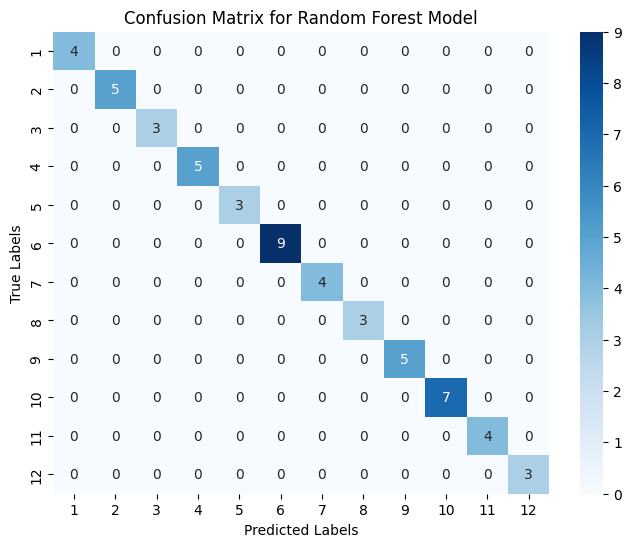

In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model from the .pkl file
with open('/content/best_rf_model_with_12.pkl', 'rb') as f:
    best_rf_model = pickle.load(f)
    print("Best model loaded successfully!")

# Load the new dataset (assuming it's in a CSV file)
dataset_path = '/content/SSL12.csv'  # Update with your dataset file path
new_data = pd.read_csv(dataset_path)

# Preprocess the new data (you may need to adapt this based on your data structure)
# For demonstration purposes, assuming that the new dataset has the same features as the training data
X_new = new_data.drop('LABEL', axis=1)  # Replace 'LABEL' with your actual target column name
y_new = new_data['LABEL']  # Replace 'LABEL' with your actual target column name

# Split into training and testing (if not already done in the CSV)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Predict using the loaded model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
test_acc = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_acc:.4f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plotting Confusion Matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


n_estimators = 10: Train Accuracy = 1.0000, Test Accuracy = 0.8545, Overfitting = 0.1455
n_estimators = 20: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
n_estimators = 30: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
n_estimators = 40: Train Accuracy = 1.0000, Test Accuracy = 0.9273, Overfitting = 0.0727
n_estimators = 50: Train Accuracy = 1.0000, Test Accuracy = 0.9273, Overfitting = 0.0727
n_estimators = 60: Train Accuracy = 1.0000, Test Accuracy = 0.9273, Overfitting = 0.0727
n_estimators = 70: Train Accuracy = 1.0000, Test Accuracy = 0.9273, Overfitting = 0.0727
n_estimators = 80: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
n_estimators = 90: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
n_estimators = 100: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
Best n_estimators: 20 (Least Overfitting)


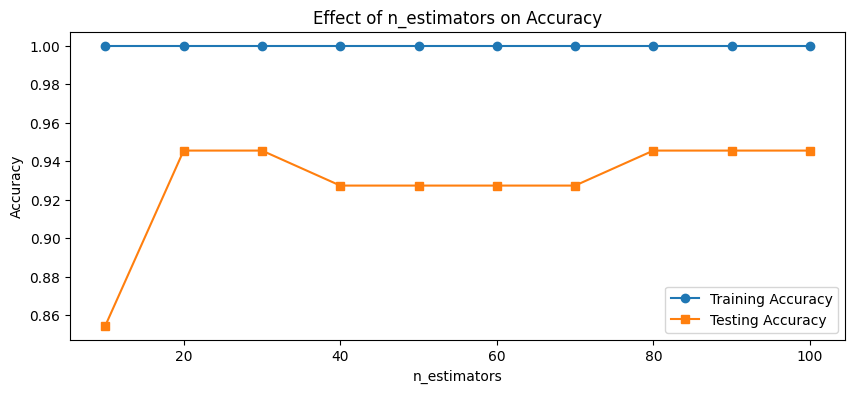

max_depth = 2: Train Accuracy = 0.8249, Test Accuracy = 0.7091, Overfitting = 0.1158
max_depth = 4: Train Accuracy = 0.9585, Test Accuracy = 0.9091, Overfitting = 0.0494
max_depth = 6: Train Accuracy = 1.0000, Test Accuracy = 0.9091, Overfitting = 0.0909
max_depth = 8: Train Accuracy = 1.0000, Test Accuracy = 0.9636, Overfitting = 0.0364
max_depth = 10: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
max_depth = 12: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
max_depth = 14: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
max_depth = 16: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
max_depth = 18: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
max_depth = 20: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
Best max_depth: 8 (Least Overfitting)


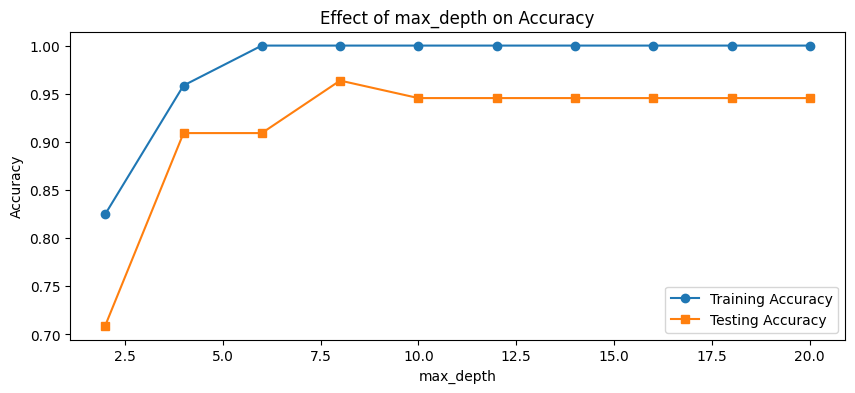

min_samples_split = 2: Train Accuracy = 1.0000, Test Accuracy = 0.9636, Overfitting = 0.0364
min_samples_split = 4: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
min_samples_split = 6: Train Accuracy = 1.0000, Test Accuracy = 0.9455, Overfitting = 0.0545
min_samples_split = 8: Train Accuracy = 0.9954, Test Accuracy = 0.9455, Overfitting = 0.0499
min_samples_split = 10: Train Accuracy = 0.9862, Test Accuracy = 0.9455, Overfitting = 0.0407
min_samples_split = 12: Train Accuracy = 0.9816, Test Accuracy = 0.9091, Overfitting = 0.0725
min_samples_split = 14: Train Accuracy = 0.9816, Test Accuracy = 0.9091, Overfitting = 0.0725
min_samples_split = 16: Train Accuracy = 0.9724, Test Accuracy = 0.8727, Overfitting = 0.0996
min_samples_split = 18: Train Accuracy = 0.9631, Test Accuracy = 0.9091, Overfitting = 0.0540
min_samples_split = 20: Train Accuracy = 0.9539, Test Accuracy = 0.9091, Overfitting = 0.0448
Best min_samples_split: 2 (Least Overfitting)


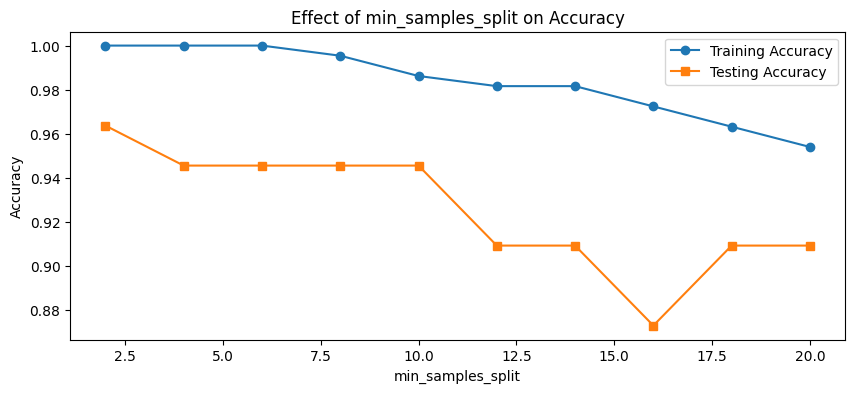

Final Best Parameters: n_estimators=20, max_depth=8, min_samples_split=2
Final Training Accuracy: 1.0000
Final Testing Accuracy: 0.9636


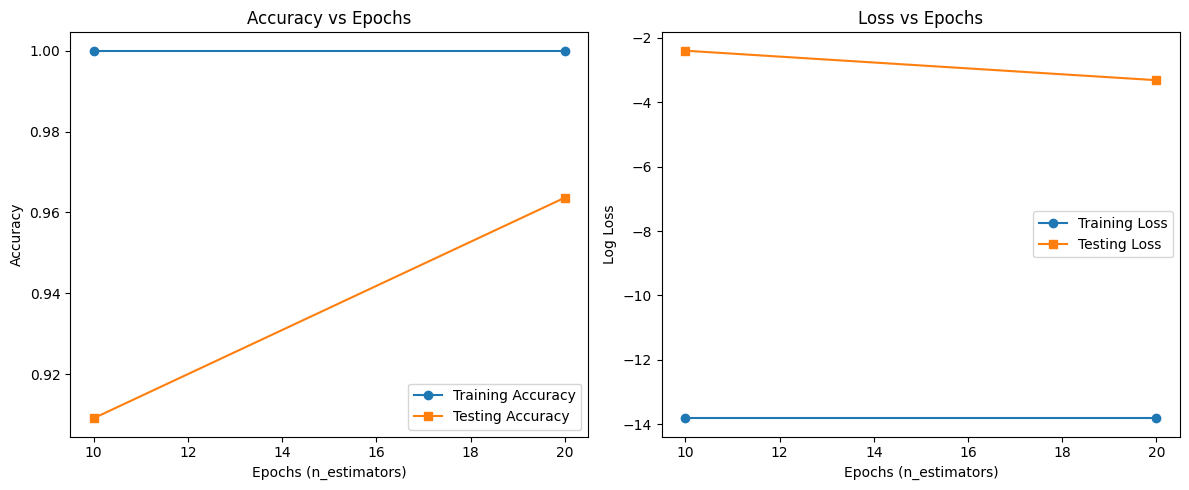

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv('/content/SSL12.csv')  # Replace with actual path

# Preprocessing
X = data.drop(columns='LABEL')  # Assuming 'LABEL' is your label column
y = data['LABEL']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate overfitting with different hyperparameters
def evaluate_overfitting(param_name, param_values, fixed_params):
    train_accuracies = []
    test_accuracies = []
    overfitting_scores = []

    for value in param_values:
        params = fixed_params.copy()
        params[param_name] = value
        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        overfitting_scores.append(abs(train_acc - test_acc))

        print(f"{param_name} = {value}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}, Overfitting = {abs(train_acc - test_acc):.4f}")

    best_value = param_values[np.argmin(overfitting_scores)]
    print(f"Best {param_name}: {best_value} (Least Overfitting)")

    # Plot accuracy
    plt.figure(figsize=(10, 4))
    plt.plot(param_values, train_accuracies, label="Training Accuracy", marker="o")
    plt.plot(param_values, test_accuracies, label="Testing Accuracy", marker="s")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.title(f"Effect of {param_name} on Accuracy")
    plt.legend()
    plt.show()

    return best_value

# Default parameters
default_params = {'random_state': 42}

# Evaluate for n_estimators
best_n_estimators = evaluate_overfitting("n_estimators", range(10, 110, 10), default_params)

# Evaluate for max_depth
default_params["n_estimators"] = best_n_estimators
best_max_depth = evaluate_overfitting("max_depth", range(2, 21, 2), default_params)

# Evaluate for min_samples_split
default_params["max_depth"] = best_max_depth
best_min_samples_split = evaluate_overfitting("min_samples_split", range(2, 21, 2), default_params)

# Print the final best parameters
print(f"Final Best Parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}, min_samples_split={best_min_samples_split}")

# Train the final model with best parameters
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
best_model.fit(X_train, y_train)

# Calculate final training and testing accuracy
final_train_acc = accuracy_score(y_train, best_model.predict(X_train))
final_test_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Testing Accuracy: {final_test_acc:.4f}")

# Plot accuracy/loss vs epochs (n_estimators)
n_estimators_range = range(10, best_n_estimators + 10, 10)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    train_losses.append(np.log(max(1e-6, 1 - train_acc)))
    test_losses.append(np.log(max(1e-6, 1 - test_acc)))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(n_estimators_range, test_accuracies, label="Testing Accuracy", marker="s")
plt.xlabel("Epochs (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_losses, label="Training Loss", marker="o")
plt.plot(n_estimators_range, test_losses, label="Testing Loss", marker="s")
plt.xlabel("Epochs (n_estimators)")
plt.ylabel("Log Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.tight_layout()
plt.show()


Best model loaded successfully!
Train size: 27, Train Acc: 1.0000, Test Acc: 0.6653
Train size: 54, Train Acc: 0.9815, Test Acc: 0.8165
Train size: 81, Train Acc: 0.9877, Test Acc: 0.8743
Train size: 108, Train Acc: 0.9907, Test Acc: 0.8841
Train size: 135, Train Acc: 1.0000, Test Acc: 0.9270
Train size: 162, Train Acc: 0.9877, Test Acc: 0.9545
Train size: 189, Train Acc: 0.9841, Test Acc: 0.9639
Train size: 216, Train Acc: 0.9907, Test Acc: 0.9286
Train size: 244, Train Acc: 0.9836, Test Acc: 0.9643


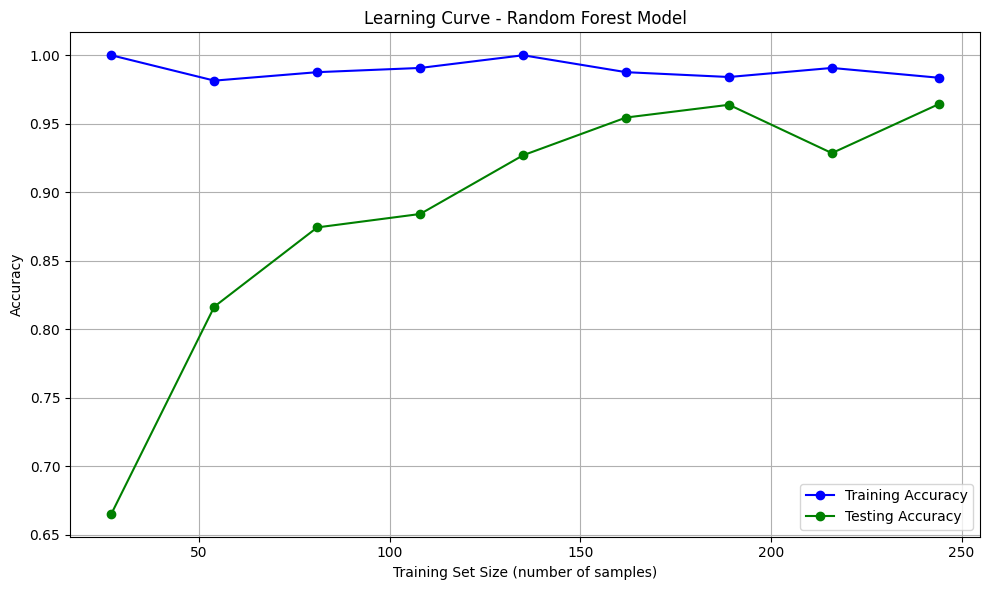

In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load best model
with open('/content/best_rf_model_with_12.pkl', 'rb') as f:
    best_rf_model = pickle.load(f)
    print("Best model loaded successfully!")

# Load dataset
dataset_path = '/content/SSL12.csv'
data = pd.read_csv(dataset_path)

# Features and labels
X = data.drop('LABEL', axis=1)
y = data['LABEL']

# Define training sizes as actual sample counts
total_samples = len(X)
train_sample_sizes = np.linspace(int(0.1 * total_samples), int(0.9 * total_samples), 9, dtype=int)

train_accuracies = []
test_accuracies = []

# Loop over different training sizes
for size in train_sample_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=size, random_state=42, stratify=y
    )

    # Create new model using same parameters
    model = RandomForestClassifier(**best_rf_model.get_params())
    model.fit(X_train, y_train)

    # Accuracy scores
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Train size: {size}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sample_sizes, train_accuracies, 'o-', label='Training Accuracy', color='blue')
plt.plot(train_sample_sizes, test_accuracies, 'o-', label='Testing Accuracy', color='green')
plt.xlabel('Training Set Size (number of samples)')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest Model')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
